In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
path = r'C:\Users\s.wienecke\Documents\Fortbildung\Letztes Modul'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'immo_data_clean_6.2.csv'))

# 2. Data cleaning

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'state', 'serviceCharge', 'heatingType',
       'telekomTvOffer', 'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'cellar', 'yearConstructedRange',
       'baseRent', 'livingSpace', 'lift', 'baseRentRange', 'typeOfFlat',
       'postcode', 'noRooms', 'floor', 'noRoomsRange', 'garden',
       'livingSpaceRange', 'city/county', 'city district', 'date',
       'Picture category'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,Unnamed: 0.1,state,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,typeOfFlat,postcode,noRooms,floor,noRoomsRange,garden,livingSpaceRange,city/county,city district,date,Picture category
0,0,0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.000000,840.000000,1965.0,96107057,oil,False,True,2.0,595.0,86.00,False,4,ground_floor,44269,4.0,1.000000,4,True,4,Dortmund,Schüren,May19,Least pictures
1,1,1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.000000,901.331522,1871.0,111378734,gas,False,False,1.0,800.0,89.00,False,5,ground_floor,67459,3.0,2.122405,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,May19,Least pictures
2,2,2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.400000,1300.000000,2019.0,113147523,NaN,False,True,9.0,965.0,83.80,True,6,apartment,1097,3.0,3.000000,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Oct19,Least pictures
3,3,3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.000000,901.331522,1964.0,108890903,district_heating,False,False,2.0,343.0,58.15,False,2,other,9599,3.0,3.000000,3,False,2,Mittelsachsen_Kreis,Freiberg,May19,Least pictures
4,4,4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,28.804928,903.000000,1950.0,114751222,gas,False,False,1.0,765.0,84.97,False,5,apartment,28213,3.0,1.000000,3,False,4,Bremen,Neu_Schwachhausen,Feb20,Few pictures


In [8]:
df.shape

(268850, 33)

## Missing values

In [9]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                  0
Unnamed: 0.1                0
state                       0
serviceCharge               0
heatingType             44856
telekomTvOffer          32619
newlyConst                  0
balcony                     0
picturecount                0
pricetrend                  0
telekomUploadSpeed          0
totalRent                   0
yearConstructed             0
scoutId                     0
firingTypes             56964
hasKitchen                  0
cellar                      0
yearConstructedRange        0
baseRent                    5
livingSpace                 0
lift                        0
baseRentRange               0
typeOfFlat              36614
postcode                    0
noRooms                     0
floor                       0
noRoomsRange                0
garden                      0
livingSpaceRange            0
city/county                 0
city district               0
date                        0
Picture category            0
dtype: int

In [10]:
# dropping colums
df2 = df.drop(columns = ['heatingType', 'telekomTvOffer', 'firingTypes', 'typeOfFlat'])

In [11]:
#showing total record count of missing values
df2.isnull().sum().sum()

5

In [12]:
# subset of the dataframe containing only the missing values
df_nan = df2[df2['baseRent'].isnull() == True]

In [13]:
df_nan

,Unnamed: 0,Unnamed: 0.1,state,serviceCharge,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,hasKitchen,cellar,yearConstructedRange,baseRent,livingSpace,lift,baseRentRange,postcode,noRooms,floor,noRoomsRange,garden,livingSpaceRange,city/county,city district,date,Picture category
8406,8406,8406,Baden_Württemberg,151.206113,False,True,13,3.90,5.000000,1.234567e+06,1966.40059,107360251,True,False,3.714544,NaN,76.00,False,9,68789,4.0,2.122405,4,False,3,Rhein_Neckar_Kreis,Sankt_Leon_Rot,Sep18,Few pictures
16731,16731,16731,Sachsen,151.206113,False,True,1,4.07,40.000000,9.013315e+02,1966.40059,115233180,False,True,3.714544,NaN,65.72,False,9,4157,3.0,2.122405,3,False,3,Leipzig,Gohlis_Mitte,Feb20,Least pictures
243713,243713,243713,Nordrhein_Westfalen,25000.000000,False,True,12,3.61,40.000000,9.013315e+02,1984.00000,111426318,False,True,4.000000,NaN,14000.00,False,9,45133,3.5,1.000000,3,False,7,Essen,Bredeney,May19,Few pictures
260259,260259,260259,Sachsen_Anhalt,151.206113,False,False,1,2.22,28.804928,1.000000e+06,1966.40059,91194882,False,False,3.714544,NaN,10.00,False,9,39624,1.0,2.122405,1,False,1,Altmarkkreis_Salzwedel,Güssefeld,May19,Least pictures
264934,264934,264934,Saarland,151.206113,False,False,0,4.41,28.804928,9.013315e+02,1966.40059,113543854,False,False,3.714544,NaN,1.00,False,9,66666,1.0,2.122405,1,False,1,Merzig_Wadern_Kreis,Beckingen,Feb20,Least pictures


In [14]:
df2.describe()

,Unnamed: 0,Unnamed: 0.1,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,yearConstructedRange,baseRent,livingSpace,baseRentRange,postcode,noRooms,floor,noRoomsRange,livingSpaceRange
count,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,2.688500e+05,268850.000000,2.688500e+05,268850.000000,268845.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000,268850.000000
mean,134424.500000,134424.500000,151.206113,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,3.714544,647.741754,74.355548,3.765256,37283.022235,2.641261,2.122405,2.571542,3.070790
std,77610.454273,77610.454273,304.308647,6.408399,1.958168,15.290063,3.063151e+04,41.709858,1.250093e+07,2.430343,516.177829,254.759208,2.214357,27798.037296,2.633440,3.269730,0.937594,1.407127
min,0.000000,0.000000,0.000000,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,1.000000,0.000000,0.000000,1.000000,852.000000,1.000000,-1.000000,1.000000,1.000000
25%,67212.250000,67212.250000,96.000000,6.000000,2.000000,10.000000,4.950000e+02,1958.000000,1.066910e+08,2.000000,338.000000,54.000000,2.000000,9128.000000,2.000000,1.000000,2.000000,2.000000
50%,134424.500000,134424.500000,140.000000,9.000000,3.389001,40.000000,7.410000e+02,1966.400590,1.111584e+08,3.714544,490.000000,67.320000,3.000000,38667.000000,3.000000,2.000000,3.000000,3.000000
75%,201636.750000,201636.750000,185.000000,13.000000,4.560000,40.000000,9.013315e+02,1992.000000,1.137688e+08,5.000000,799.000000,87.000000,5.000000,57072.000000,3.000000,3.000000,3.000000,4.000000
max,268849.000000,268849.000000,146118.000000,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,9.000000,39200.000000,111111.000000,9.000000,99998.000000,999.990000,999.000000,5.000000,7.000000


In [15]:
# median function for replacing numeric values
df2.median()

Unnamed: 0              1.344245e+05
Unnamed: 0.1            1.344245e+05
serviceCharge           1.400000e+02
newlyConst              0.000000e+00
balcony                 1.000000e+00
picturecount            9.000000e+00
pricetrend              3.389001e+00
telekomUploadSpeed      4.000000e+01
totalRent               7.410000e+02
yearConstructed         1.966401e+03
scoutId                 1.111584e+08
hasKitchen              0.000000e+00
cellar                  1.000000e+00
yearConstructedRange    3.714544e+00
baseRent                4.900000e+02
livingSpace             6.732000e+01
lift                    0.000000e+00
baseRentRange           3.000000e+00
postcode                3.866700e+04
noRooms                 3.000000e+00
floor                   2.000000e+00
noRoomsRange            3.000000e+00
garden                  0.000000e+00
livingSpaceRange        3.000000e+00
dtype: float64

In [16]:
column_median = df2.median()
df2 = df2.fillna(column_median)

In [17]:
#showing total record count of missing values
df2.isnull().sum().sum()

0

## Duplicates check

In [18]:
dups = df2.duplicated()

In [19]:
dups.shape 

(268850,)

No dups

## Extreme values checks

C:\Users\s.wienecke\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='baseRent', ylabel='Density'>

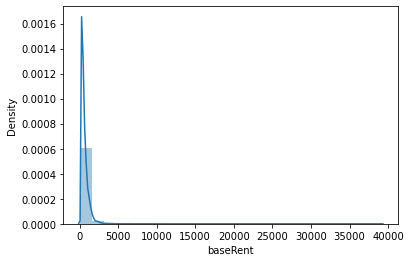

In [20]:
# Shows extreme values
sns.distplot(df2['baseRent'], bins=25)

In [21]:
# Check the mean
df2['baseRent'].mean() 

647.7388201599427

In [22]:
# Check the median
df2['baseRent'].median() 

490.0

In [23]:
# Check the max
df2['baseRent'].max() 

39200.0

## Hypothesis

If the flat has more rooms, then the base rent will be higher.

# 3. Data prep for regression analysis 

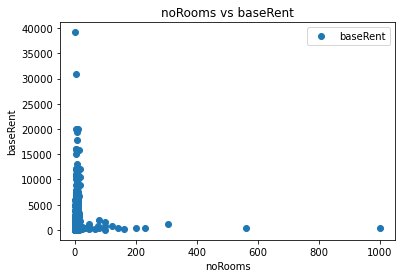

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df2.plot(x = 'noRooms', y='baseRent',style='o')
plt.title('noRooms vs baseRent')  
plt.xlabel('noRooms')  
plt.ylabel('baseRent')  
plt.show()

In [25]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df2['noRooms'].values.reshape(-1,1)
y = df2['baseRent'].values.reshape(-1,1)

In [26]:
X

array([[4.],
       [3.],
       [3.],
       ...,
       [4.],
       [2.],
       [3.]])

In [27]:
y

array([[595.],
       [800.],
       [965.],
       ...,
       [650.],
       [840.],
       [935.]])

In [28]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 4. Regression analysis

In [29]:
# Create a regression object. (fit onto the training set)
regression = LinearRegression()

In [30]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

##  Fit the model to the training set

In [31]:
# Predict (This is predicting X_train!)
y_predicted_train = regression.predict(X_train)

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[23.48617846]]
Mean squared error:  259015.26534178233
R2 score:  0.01965537038787113


Here we have a positive slope indicating a positive relationship (if X increases, y also increases).

The MSE is very large at 259015.2653. This suggests that regression may not be the best model to represent this data and may not accurately predict the impact of the number of rooms on the base rent.

R2 value is close to 0 with 0.01965537038787113, so there is very poor fit here.

In summary, it's pretty clear that the model isn't performing too well.

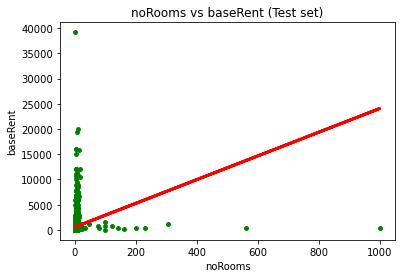

In [35]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('noRooms vs baseRent (Test set)')
plot_test.xlabel('noRooms')
plot_test.ylabel('baseRent')
plot_test.show()

We can see that the linear model represented by the red regression line does not cover the data points. In the area where the number of rooms is small, there are the most data points that indicate a higher price, which contradicts my hypothesis.

## Create a prediction for y on the test set

In [36]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

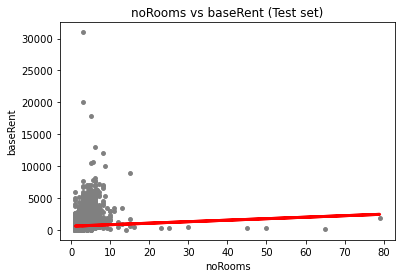

In [37]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('noRooms vs baseRent (Test set)')
plot_test.xlabel('noRooms')
plot_test.ylabel('baseRent')
plot_test.show()

We can see (here as well) that the linear model represented by the red regression line does not cover part of the data points. In the area where the number of rooms is small, there are many data points that indicate a higher price, which contradicts my hypothesis.

In [38]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [39]:
# Print the model summary statistics for evaluation the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[23.48617846]]
Mean squared error:  262002.26061382756
R2 score:  0.03543429483106786


Here we have a positive slope indicating a positive relationship (if X increases, y also increases).

The MSE is very large at 262002.26. This suggests that regression may not be the best model to represent this data and may not accurately predict the impact of the number of rooms on the base rent.

R2 value is close to 0 with 0.03543429483106786, so there is poor fit here.

In summary, it's pretty clear that the model isn't performing too well.

--> No overfitting because there is no higher R2 value in the training data set and a lower value in the test data set.

In [40]:
y_predicted

array([[656.18452639],
       [679.67070485],
       [656.18452639],
       ...,
       [632.69834793],
       [656.18452639],
       [679.67070485]])

In [41]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,305.00,656.184526
1,970.00,679.670705
2,1490.00,656.184526
3,369.49,644.441437
4,284.57,656.184526
5,302.00,656.184526
6,540.00,667.927616
7,310.00,632.698348
8,159.68,609.212169
9,415.00,632.698348


We can see that there’s quite the difference between the actual and predicted y values. This just adds evidence to the fact that the model isn’t doing a great job of explaining the relationship between the "Number of Rooms" and “Base Rent” variables.

## General conclusion & Bias

It was possible to confirm the inaccuracy of the model here, so I can rule out my hypothesis "If the flat has more rooms, then the base rent will be higher..As it turns out, this statement is only marginally correct. 

The number of rooms is a factor, but it is not the only factor in price formation. It plays a partial role when the number of rooms increases (this drives the price up linearly to some extent), but it does not play as big a role when the number of rooms is small.  

There could be a bias because the dataset only contains 3 periods where the data was pulled from Immoscout. A data set with a longer time period or more than 3 time periods would possibly show a different result. Furthermore, the data set only includes the advertisements from one platform (Immoscout). This could be an additional bias.